# 1. Solar generation plant

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.1 Import and clean the data

In [2]:
#Import data for solar generation plant and print
solar_data= pd.read_csv('solar_generation_data.csv')

In [3]:
#Data shape
solar_data.shape

(365, 8)

In [4]:
# I need to work on the temperature degrees and convert it from strings to float type:
solar_data['Temp Low']=solar_data['Temp Low'].str[:-1].astype('float');
solar_data['Temp Hi']=solar_data['Temp Hi'].str[:-1].astype('float');

In [5]:
# Convert to cloud percentage to float
solar_data['Cloud Cover Percentage']=solar_data['Cloud Cover Percentage'].astype('float')

In [6]:
#Now let me see the type of data I am dealing with
solar_data.isnull()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,True,False
361,False,False,False,False,False,False,True,False
362,False,False,False,False,False,False,True,False
363,False,False,False,False,False,False,True,False


##### Comment: There are NaN in the column of rainfall. I am going to replace this with 0

In [7]:
#Fill all the missing values with zeros
solar_data = solar_data.fillna(0)

## 1.2 Inspect and Visualize the data

In [8]:
#Information about the data
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
Month                     365 non-null object
Day                       365 non-null int64
Temp Hi                   365 non-null float64
Temp Low                  365 non-null float64
Solar                     365 non-null float64
Cloud Cover Percentage    365 non-null float64
Rainfall in mm            365 non-null float64
Power Generated in MW     365 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 22.9+ KB


##### Comment: I am going to drop the month, day for model reasons

In [9]:
solar_data.drop(['Month ','Day'],axis=1,inplace=True)

In [10]:
print(solar_data)

     Temp Hi  Temp Low  Solar  Cloud Cover Percentage  Rainfall in mm  \
0      109.0      85.0   30.0                     9.0             0.0   
1      106.0      71.0   30.1                     9.0             0.0   
2      106.0      81.0   29.5                     9.0             0.0   
3      102.0      83.0   13.0                     4.0             0.0   
4      105.0      80.0   30.1                     9.0             0.0   
..       ...       ...    ...                     ...             ...   
360    101.0      83.0   26.4                     8.0             0.0   
361    102.0      84.0   25.8                     8.0             0.0   
362    104.0      83.0   26.9                     8.0             0.0   
363    105.0      80.0   25.1                     8.0             0.0   
364    108.0      81.0   29.0                     9.0             0.0   

     Power Generated in MW  
0                     9.93  
1                     9.97  
2                     9.77  
3      

In [11]:
#Statistical summary
solar_data.describe()

,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,91.687671,66.635616,22.615068,6.972603,2.339726,7.488192
std,10.281531,10.750484,5.311600,1.699811,15.256405,1.759069
min,66.000000,43.000000,1.500000,1.000000,0.000000,0.500000
25%,83.000000,58.000000,18.500000,6.000000,0.000000,6.130000
50%,93.000000,68.000000,22.800000,7.000000,0.000000,7.550000
75%,99.000000,75.000000,27.000000,9.000000,0.000000,8.940000
max,111.000000,94.000000,30.200000,9.000000,161.500000,10.000000


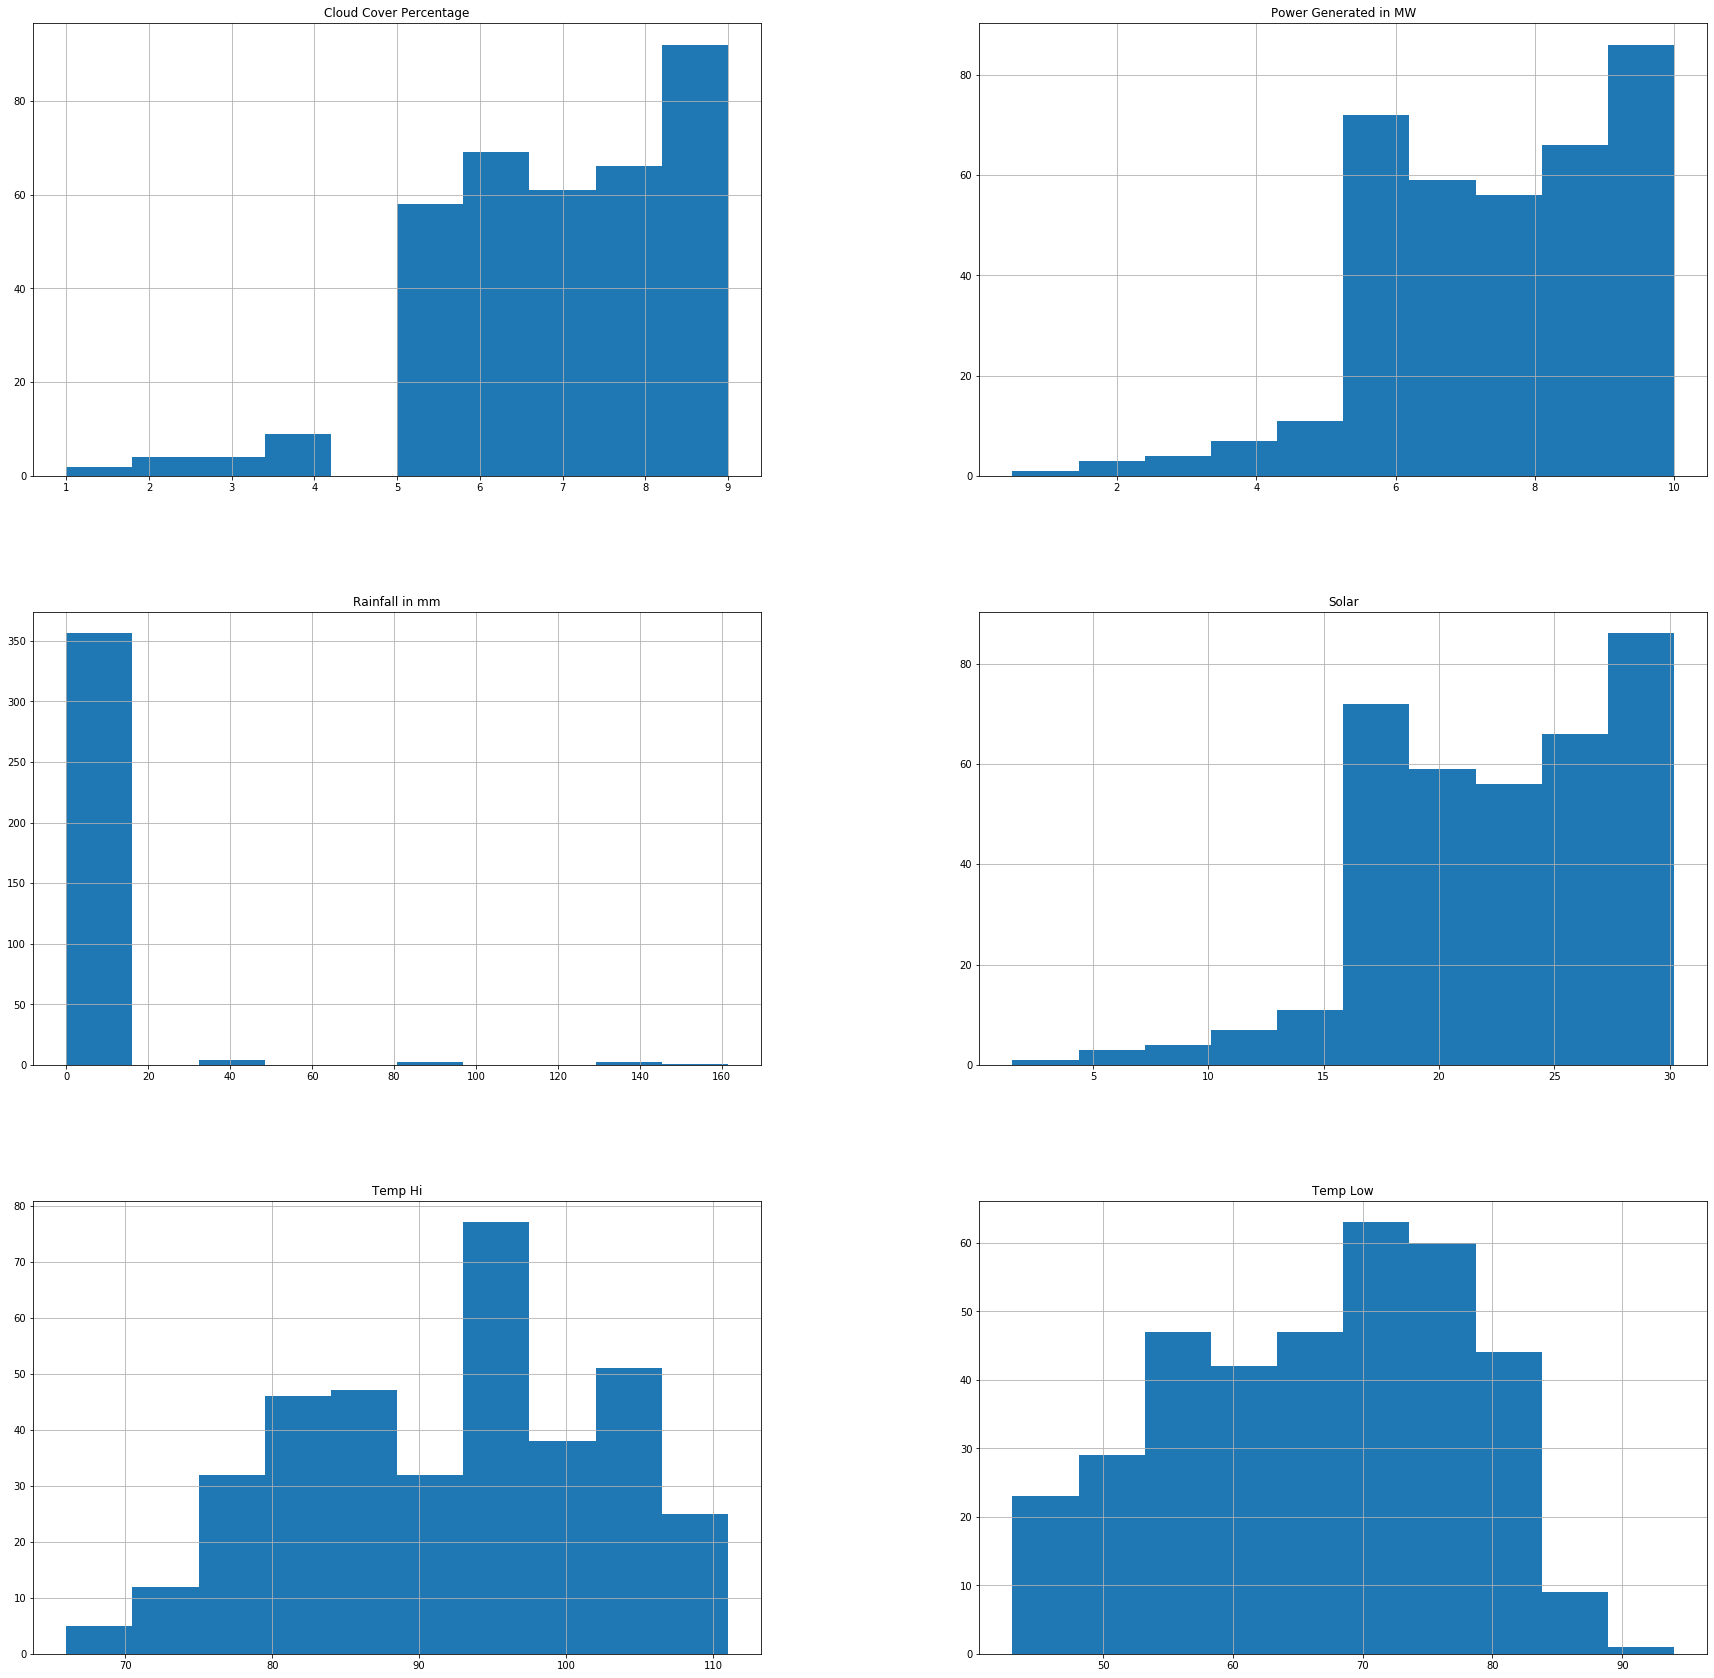

In [12]:
#Histograms of the data features
pd.DataFrame.hist(solar_data, figsize=(30,30));

In [13]:
#Correlation
solar_data.corr()

,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
Temp Hi,1.000000,0.824375,0.689956,0.680952,-0.000373,0.689928
Temp Low,0.824375,1.000000,0.471354,0.463848,0.133560,0.471315
Solar,0.689956,0.471354,1.000000,0.985455,-0.388287,0.999999
Cloud Cover Percentage,0.680952,0.463848,0.985455,1.000000,-0.389593,0.985493
Rainfall in mm,-0.000373,0.133560,-0.388287,-0.389593,1.000000,-0.388214
Power Generated in MW,0.689928,0.471315,0.999999,0.985493,-0.388214,1.000000


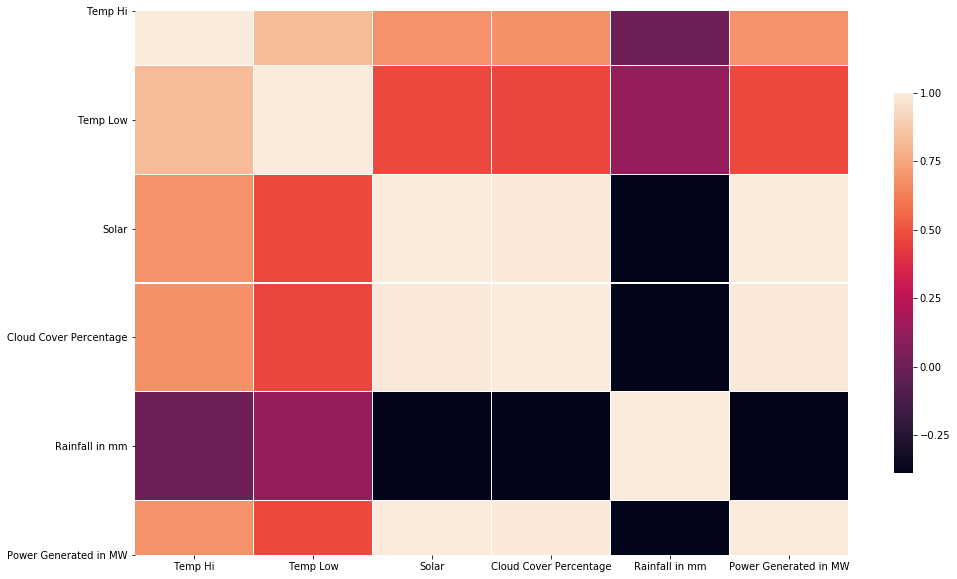

In [14]:
corr = solar_data.corr()
pyplot.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                  
           cbar_kws={"shrink": .7})     

In [18]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
Temp Hi                   365 non-null float64
Temp Low                  365 non-null float64
Solar                     365 non-null float64
Cloud Cover Percentage    365 non-null float64
Rainfall in mm            365 non-null float64
Power Generated in MW     365 non-null float64
dtypes: float64(6)
memory usage: 17.2 KB


## 1.3 Modelling 

In [19]:
#Feature engineering
y = solar_data['Power Generated in MW'].values # Output variable
X = solar_data.drop(['Power Generated in MW', 'Solar', 'Rainfall in mm'], axis = 1).values # Inputs variables.

I decided to drop rainfall and solar because I do not have info on them on the my weather api's I am using.

In [20]:
#Import the libraries
from sklearn import linear_model # for linear regression modeling
from sklearn import metrics

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(292, 3) (292,)
(73, 3) (73,)


In [24]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [25]:
predictions = lm.predict(X_test)

In [26]:
print("Score:", model.score(X_test, y_test))

Score: 0.9717327830631636


# 2. Wind generation Plant

## 2.1 Import and clean data

In [27]:
#import data for the wind generation plant and print
wind_data = pd.read_csv('wind_generation_data.csv')
wind_data.head()

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22


In [28]:
#Now let me see the type of data I am dealing with
wind_data.isnull()

,wind speed,direction,Power Output
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
361,False,False,False
362,False,False,False
363,False,False,False
364,False,False,False


## 2.2 Inspect and visualize

In [29]:
#Information about the data
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
wind speed      366 non-null float64
direction       366 non-null int64
Power Output    366 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [30]:
wind_data['direction']=wind_data['direction'].astype('float')

In [31]:
#stat summary
wind_data.describe()

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


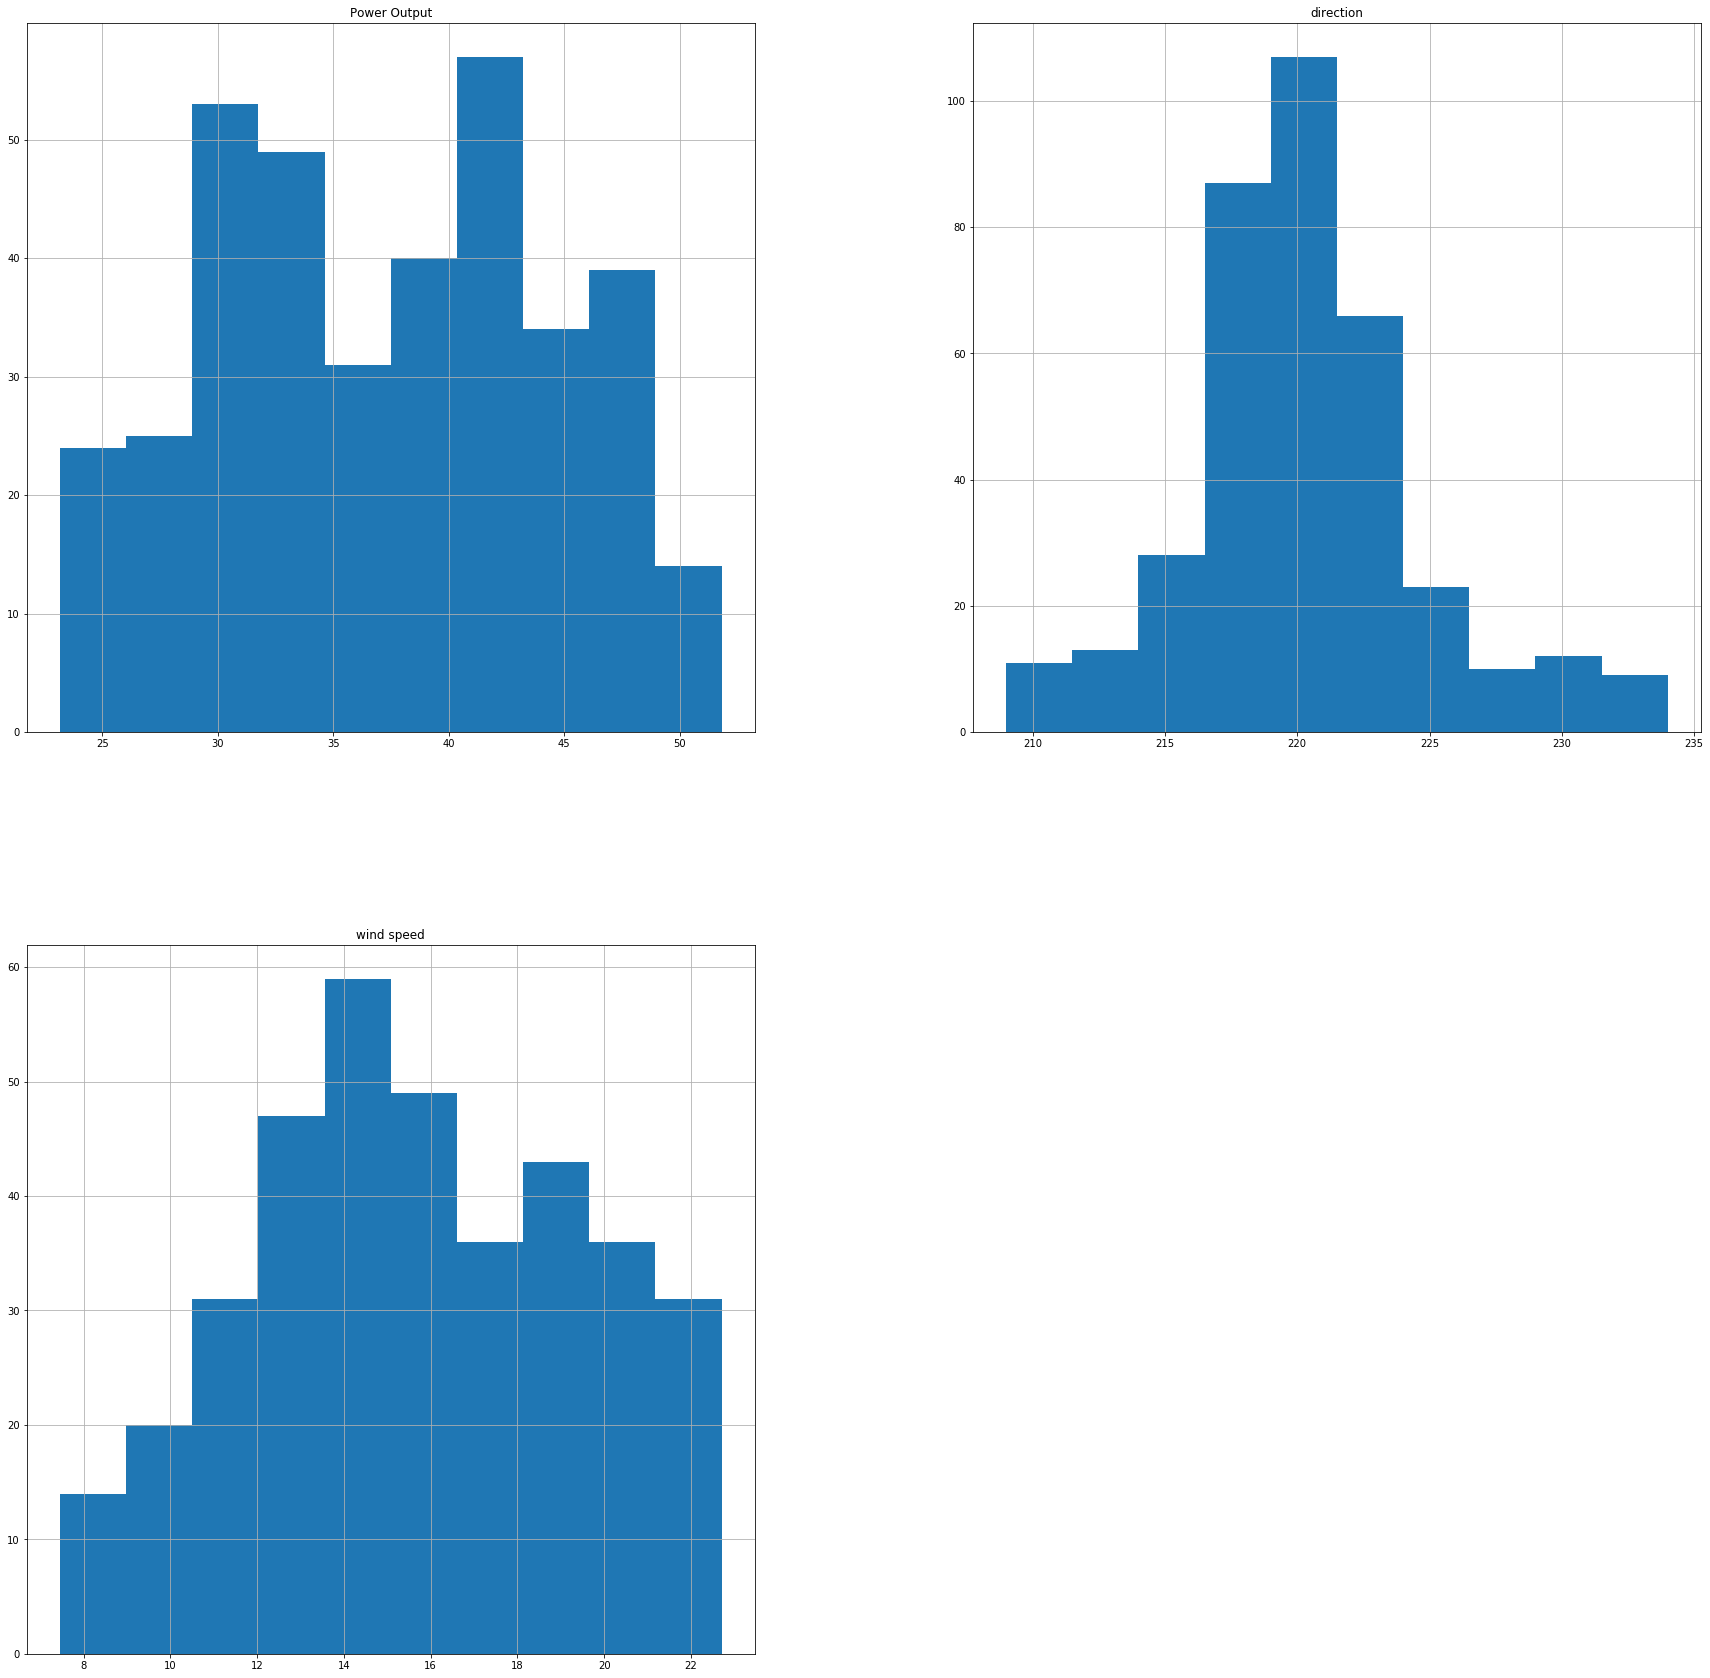

In [32]:
#Histograms of the data features
pd.DataFrame.hist(wind_data, figsize=(30,30));

## 2.3 Modelling

In [168]:
#Feature engineering
y = wind_data['Power Output'].values # Output variable
X = wind_data.drop(['Power Output'], axis = 1).values # Inputs variables

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
#Transform the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#model = RandomForestRegressor(n_jobs=-1, min_impurity_decrease=10)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

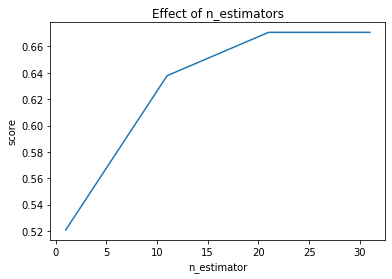

In [38]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [39]:
#predict
y_predicted = model.predict(X_test)

In [40]:
#Score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
score = r2_score(y_test, y_predicted)
score

0.6707320579510769

# 3. Save models

In [41]:
import pickle

In [42]:
# Solar farm model
filename = 'solar_data_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [43]:
# Wind farm model
filename = 'wind_data_model.sav'
pickle.dump(model, open(filename, 'wb'))

# 4. API application

Comment: I am going to work on this notebook to check what I am doing and take it to python. I am working on the notebook becuase I am more comfortable on jupyter than on atoms.

For Solar plant: I am also going to use civilight and meteo from the 7timer infor API because one cloud coverage and the other does not have high and min temp. I need all 3 inputs

In [85]:
# First import requests
import requests

In [86]:
# Get the data from the weather API: 7timer.info
url = 'http://www.7timer.info/bin/api.pl?lon=142.11.17&lat=-19.46&product=civillight&output=json'
data_solar = requests.get(url).json()

In [87]:
print(data_solar)

{'product': 'civillight', 'init': '2020100400', 'dataseries': [{'date': 20201004, 'weather': 'pcloudy', 'temp2m': {'max': 34, 'min': 28}, 'wind10m_max': 3}, {'date': 20201005, 'weather': 'clear', 'temp2m': {'max': 36, 'min': 20}, 'wind10m_max': 4}, {'date': 20201006, 'weather': 'clear', 'temp2m': {'max': 36, 'min': 22}, 'wind10m_max': 3}, {'date': 20201007, 'weather': 'clear', 'temp2m': {'max': 36, 'min': 22}, 'wind10m_max': 4}, {'date': 20201008, 'weather': 'clear', 'temp2m': {'max': 35, 'min': 23}, 'wind10m_max': 3}, {'date': 20201009, 'weather': 'clear', 'temp2m': {'max': 37, 'min': 25}, 'wind10m_max': 4}, {'date': 20201010, 'weather': 'clear', 'temp2m': {'max': 38, 'min': 25}, 'wind10m_max': 3}]}


In [105]:
date = []
temp_hi = []
temp_low = []
for i in range(7):
    dt = data_solar['dataseries'][i]['date']
    th = data_solar['dataseries'][i]['temp2m']['max']
    tl = data_solar['dataseries'][i]['temp2m']['min']
    date.append(dt)
    temp_hi.append(th)
    temp_low.append(tl)

In [106]:
print(date, temp_hi,temp_low)

[20201004, 20201005, 20201006, 20201007, 20201008, 20201009, 20201010] [34, 36, 36, 36, 35, 37, 38] [28, 20, 22, 22, 23, 25, 25]


In [107]:
#Now api for the cloud cover:
url_1 = 'http://www.7timer.info/bin/api.pl?lon=142.11.17&lat=-19.46&product=meteo&output=json'
data_solar1 = requests.get(url_1).json()# gets wind data
cloud_cover =[]
for i in range(7):
    cloud = data_solar1['dataseries'][i]['cloudcover']
    cloud_cover.append(cloud)

In [108]:
print(cloud_cover)

[4, 3, 2, 1, 3, 4, 2]


In [109]:
#Create a data frame now 
data = pd.DataFrame([date,temp_hi, temp_low, cloud_cover]).transpose()

In [110]:
data

,0,1,2,3
0,20201004,34,28,4
1,20201005,36,20,3
2,20201006,36,22,2
3,20201007,36,22,1
4,20201008,35,23,3
5,20201009,37,25,4
6,20201010,38,25,2


In [121]:
data[0]

0    20201004
1    20201005
2    20201006
3    20201007
4    20201008
5    20201009
6    20201010
Name: 0, dtype: int64

In [123]:
import pickle
data.drop([0], inplace = True, axis = 1)#dropping date column
print(data)

    1   2  3
0  34  28  4
1  36  20  3
2  36  22  2
3  36  22  1
4  35  23  3
5  37  25  4
6  38  25  2


In [124]:
# Need to convert temp to Frahenhei
data['temp_hi']= (data[1]*9/5) + 32

In [125]:
print(data)

    1   2  3  temp_hi
0  34  28  4     93.2
1  36  20  3     96.8
2  36  22  2     96.8
3  36  22  1     96.8
4  35  23  3     95.0
5  37  25  4     98.6
6  38  25  2    100.4


In [126]:
data['temp_low']= (data[2]*9/5) + 32

In [127]:
data

,1,2,3,temp_hi,temp_low
0,34,28,4,93.2,82.4
1,36,20,3,96.8,68.0
2,36,22,2,96.8,71.6
3,36,22,1,96.8,71.6
4,35,23,3,95.0,73.4
5,37,25,4,98.6,77.0
6,38,25,2,100.4,77.0


In [128]:
data["cloud_cover"] = data[3]

In [129]:
data

,1,2,3,temp_hi,temp_low,cloud_cover
0,34,28,4,93.2,82.4,4
1,36,20,3,96.8,68.0,3
2,36,22,2,96.8,71.6,2
3,36,22,1,96.8,71.6,1
4,35,23,3,95.0,73.4,3
5,37,25,4,98.6,77.0,4
6,38,25,2,100.4,77.0,2


In [130]:
data.drop([1,2,3], inplace =True, axis = 1)# Drop the other columns unnamed columns

In [131]:
data

,temp_hi,temp_low,cloud_cover
0,93.2,82.4,4
1,96.8,68.0,3
2,96.8,71.6,2
3,96.8,71.6,1
4,95.0,73.4,3
5,98.6,77.0,4
6,100.4,77.0,2


I have imported my work to atom and used cmd to run my codes and check. Now for wind farm

In [154]:
url2 = 'http://www.7timer.info/bin/api.pl?lon=8.598&lat=53.557&product=meteo&output=json' # Get the wind weather data
data_wind = requests.get(url2).json()

In [155]:
data_wind ['dataseries']

[{'timepoint': 3,
  'cloudcover': 2,
  'highcloud': 1,
  'midcloud': 1,
  'lowcloud': 2,
  'rh_profile': [{'layer': '950mb', 'rh': 12},
   {'layer': '900mb', 'rh': 15},
   {'layer': '850mb', 'rh': 14},
   {'layer': '800mb', 'rh': 15},
   {'layer': '750mb', 'rh': 14},
   {'layer': '700mb', 'rh': 10},
   {'layer': '650mb', 'rh': 9},
   {'layer': '600mb', 'rh': 7},
   {'layer': '550mb', 'rh': 6},
   {'layer': '500mb', 'rh': 6},
   {'layer': '450mb', 'rh': 5},
   {'layer': '400mb', 'rh': 7},
   {'layer': '350mb', 'rh': 7},
   {'layer': '300mb', 'rh': -2},
   {'layer': '250mb', 'rh': -4},
   {'layer': '200mb', 'rh': -4}],
  'wind_profile': [{'layer': '950mb', 'direction': 190, 'speed': 5},
   {'layer': '900mb', 'direction': 195, 'speed': 5},
   {'layer': '850mb', 'direction': 200, 'speed': 5},
   {'layer': '800mb', 'direction': 195, 'speed': 5},
   {'layer': '750mb', 'direction': 195, 'speed': 5},
   {'layer': '700mb', 'direction': 195, 'speed': 6},
   {'layer': '650mb', 'direction': 185, '

In [156]:
wind_speed = []
wind_direction = []
for i in range(7):
    ws = data_wind['dataseries'][i]['wind_profile'][0]['speed']
    wd = data_wind['dataseries'][i]['wind_profile'][0]['direction']
    wind_speed.append(ws)
    wind_direction.append(wd)

In [ ]:
# I need to manipulate the speed. I randomyly chose values as specified in the documentation info of the api as per interval
speed_value ={'1': 0.15, '2': 2.4, '3':5.2, '4':7.4, '5':14.5, '6':19.3, '7':27.6, '8':33.5, '9':38.2, '10':43.5, '11':48.3, '12':53.5, '13':60.0}

In [ ]:
wind_speed = []
wind_direction = []
for i in range(7):
    s = data_wind['dataseries'][i]['wind_profile'][0]['speed']
    ws = speed_value[str(s)] #Use created dictionary labeled speed_value
    wd = data_wind['dataseries'][i]['wind_profile'][0]['direction']
    wind_speed.append(ws)
    wind_direction.append(wd)

In [162]:
#Create a data frame now 
data1 = pd.DataFrame([wind_speed, wind_direction]).transpose()
data1

,0,1
0,14.5,190.0
1,14.5,200.0
2,14.5,205.0
3,7.4,185.0
4,14.5,165.0
5,19.3,180.0
6,14.5,185.0


In [165]:
data1["wind_speed"]=data1[0]
data1["wind_diection"]=data1[1]
data1.drop([0,1], inplace=True, axis=1)

In [166]:
data1

,wind_speed,wind_diection
0,14.5,190.0
1,14.5,200.0
2,14.5,205.0
3,7.4,185.0
4,14.5,165.0
5,19.3,180.0
6,14.5,185.0


In [170]:
import pickle
wind_model = pickle.load(open('wind_data_model.sav','rb'))# load the wind_model
wind_power = wind_model.predict(data1.values)# predicted values

In [171]:
wind_power

array([48.82419355, 48.82419355, 48.82419355, 48.82419355, 48.82419355,
       48.82419355, 48.82419355])

# 5. Creating a function for dash

In [1]:
import requests
import pandas as pd
import pickle
def s():
    url = 'http://www.7timer.info/bin/api.pl?lon=142.11.17&lat=-19.46&product=civillight&output=json'
    data_solar = requests.get(url).json()
    date = []
    temp_hi = []
    temp_low = []
    for i in range(7):
        dt = data_solar['dataseries'][i]['date']
        th = data_solar['dataseries'][i]['temp2m']['max']
        tl = data_solar['dataseries'][i]['temp2m']['min']
        date.append(dt)
        temp_hi.append(th)
        temp_low.append(tl)
    url_1 = 'http://www.7timer.info/bin/api.pl?lon=142.11.17&lat=-19.46&product=meteo&output=json'
    data_solar1 = requests.get(url_1).json()# gets wind data
    cloud_cover =[]
    for i in range(7):
        cloud = data_solar1['dataseries'][i]['cloudcover']
        cloud_cover.append(cloud)
    data = pd.DataFrame([date,temp_hi, temp_low, cloud_cover]).transpose()
    data.drop([0], inplace = True, axis = 1)#dropping date column
    data['temp_hi']= (data[1]*9/5) + 32 # convert
    data['temp_low']= (data[2]*9/5) + 32
    data["cloud_cover"] = data[3]
    data.drop([1,2,3], inplace =True, axis = 1)# Drop the other columns unnamed columns
    solar_model = pickle.load(open('solar_data_model.sav', 'rb')) # Load model
    solar_power = solar_model.predict(data.values) # The predicted value
    data['solar_predicted']= solar_power
    return data

In [3]:
s()

,temp_hi,temp_low,cloud_cover,solar_predicted
0,86.0,82.4,1,1.512460
1,95.0,69.8,1,1.544777
2,95.0,71.6,1,1.546717
3,95.0,71.6,3,3.540251
4,96.8,73.4,2,2.554603
5,96.8,77.0,4,4.552017
6,100.4,75.2,1,1.578133


In [ ]:
Comment: Function ran and printed out the dataframe

In [5]:
def w():
    url2 = 'http://www.7timer.info/bin/api.pl?lon=8.598&lat=53.557&product=meteo&output=json' # Get the wind weather data
    data_wind = requests.get(url2).json()
    wind_speed = []
    wind_direction = []
    for i in range(7):
        ws = data_wind['dataseries'][i]['wind_profile'][0]['speed']
        wd = data_wind['dataseries'][i]['wind_profile'][0]['direction']
        wind_speed.append(ws)
        wind_direction.append(wd)
    # I need to manipulate the speed. I randomyly chose values as specified in the documentation info of the api as per interval
    speed_value ={'1': 0.15, '2': 2.4, '3':5.2, '4':7.4, '5':14.5, '6':19.3, '7':27.6, '8':33.5, '9':38.2, '10':43.5, '11':48.3, '12':53.5, '13':60.0}
    wind_speed = []
    wind_direction = []
    for i in range(7):
        s = data_wind['dataseries'][i]['wind_profile'][0]['speed']
        ws = speed_value[str(s)] #Use created dictionary labeled speed_value
        wd = data_wind['dataseries'][i]['wind_profile'][0]['direction']
        wind_speed.append(ws)
        wind_direction.append(wd)
    #Create a data frame now
    data1 = pd.DataFrame([wind_speed, wind_direction]).transpose()
    data1["wind_speed"]=data1[0]
    data1["wind_diection"]=data1[1]
    data1.drop([0,1], inplace=True, axis=1)
    wind_model = pickle.load(open('wind_data_model.sav','rb'))# load the wind_model
    wind_power = wind_model.predict(data1.values)# pridicted values
    data1['wind_predicted'] = wind_power
    return data1

In [6]:
w()

,wind_speed,wind_diection,wind_predicted
0,14.5,190.0,48.824194
1,14.5,200.0,48.824194
2,14.5,205.0,48.824194
3,7.4,185.0,48.824194
4,14.5,165.0,48.824194
5,19.3,180.0,48.824194
6,14.5,185.0,48.824194


In [7]:
def combined():
    wind = w()
    solar = s()
    combined = solar['solar_predicted'] + wind['wind_predicted']
    return combined

In [8]:
combined()

0    50.336653
1    50.368970
2    50.370910
3    52.364445
4    51.378796
5    53.376211
6    50.402327
dtype: float64